# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "titanic.csv"
df = pd.read_csv(file_path)

In [ ]:
df_info = df.info()
df_head = df.head()
df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


(None,
    Survived  Pclass                                               Name  \
 0         0       3                             Mr. Owen Harris Braund   
 1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
 2         1       3                              Miss. Laina Heikkinen   
 3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
 4         0       3                            Mr. William Henry Allen   
 
       Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
 0    male  22.0                        1                        0   7.2500  
 1  female  38.0                        1                        0  71.2833  
 2  female  26.0                        0                        0   7.9250  
 3  female  35.0                        1                        0  53.1000  
 4    male  35.0                        0                        0   8.0500  )

- The dataset contains **887 entries** with **8 columns**:
  - `Survived`: Target variable (0 = No, 1 = Yes)
  - `Pclass`: Passenger class (1st, 2nd, 3rd)
  - `Name`: Passenger’s name
  - `Sex`: Gender
  - `Age`: Age (float)
  - `Siblings/Spouses Aboard`: Number of siblings/spouses on board
  - `Parents/Children Aboard`: Number of parents/children on board
  - `Fare`: Ticket price

- No missing values in the dataset.
- `Sex` and `Name` are categorical features.
- Numerical features include `Age`, `Fare`, `Siblings/Spouses Aboard`, and `Parents/Children Aboard`.

In [ ]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### Summary Statistics:

- **Survival Rate**: 38.56% of passengers survived.
- **Passenger Class**: Most passengers were in 3rd class (mean ~2.31).
- **Age**: 
  - Mean: ~29.47 years
  - Min: 0.42 years (infants)
  - Max: 80 years
- **Family Members Aboard**:
  - `Siblings/Spouses Aboard`: Most had none (median = 0, max = 8).
  - `Parents/Children Aboard`: Most had none (median = 0, max = 6).
- **Fare**:
  - Mean: $32.31
  - Max: $512.33
  - 75% of fares were below $31.14 (some outliers exist).

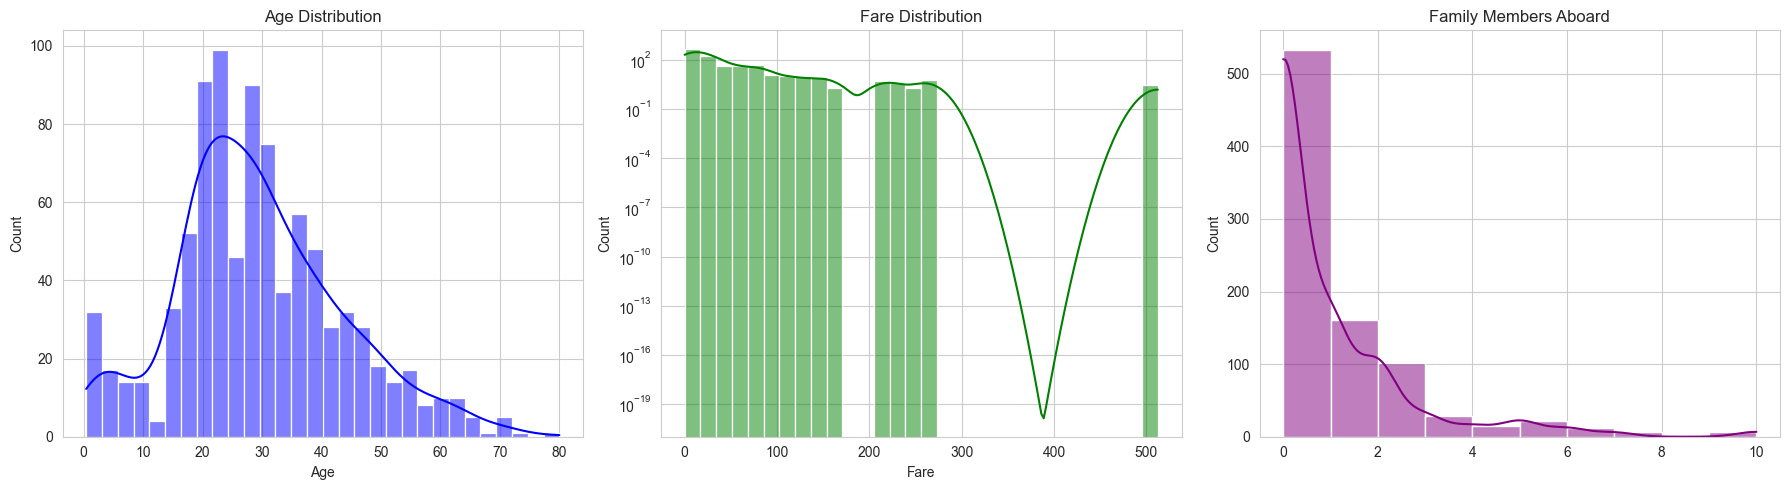

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Age Distribution")

# Fare distribution (log scale for better visibility)
sns.histplot(df['Fare'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title("Fare Distribution")
axes[1].set_yscale("log")

# Siblings/Spouses & Parents/Children Aboard combined
sns.histplot(df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'], bins=10, kde=True, ax=axes[2], color='purple')
axes[2].set_title("Family Members Aboard")

plt.tight_layout()
plt.show()


### Insights from Visualizations:

1. **Age Distribution**:  
   - Most passengers were between 20-40 years old.
   - There's a peak at very young ages, likely representing children.

2. **Fare Distribution**:  
   - The fare distribution is highly skewed with a few very high values.
   - Most passengers paid lower fares, which is expected for 3rd-class passengers.

3. **Family Members Aboard**:  
   - Most passengers traveled alone or with one family member.
   - Few had large families onboard.

C:\Users\Admin\AppData\Local\Temp\ipykernel_31928\1962652859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Sex"], y=df["Survived"], ax=axes[0], palette="coolwarm")
C:\Users\Admin\AppData\Local\Temp\ipykernel_31928\1962652859.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Pclass"], y=df["Survived"], ax=axes[1], palette="viridis")
C:\Users\Admin\AppData\Local\Temp\ipykernel_31928\1962652859.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["FamilySize"], y=df["Survived"], ax=axes[2], palette="magma")


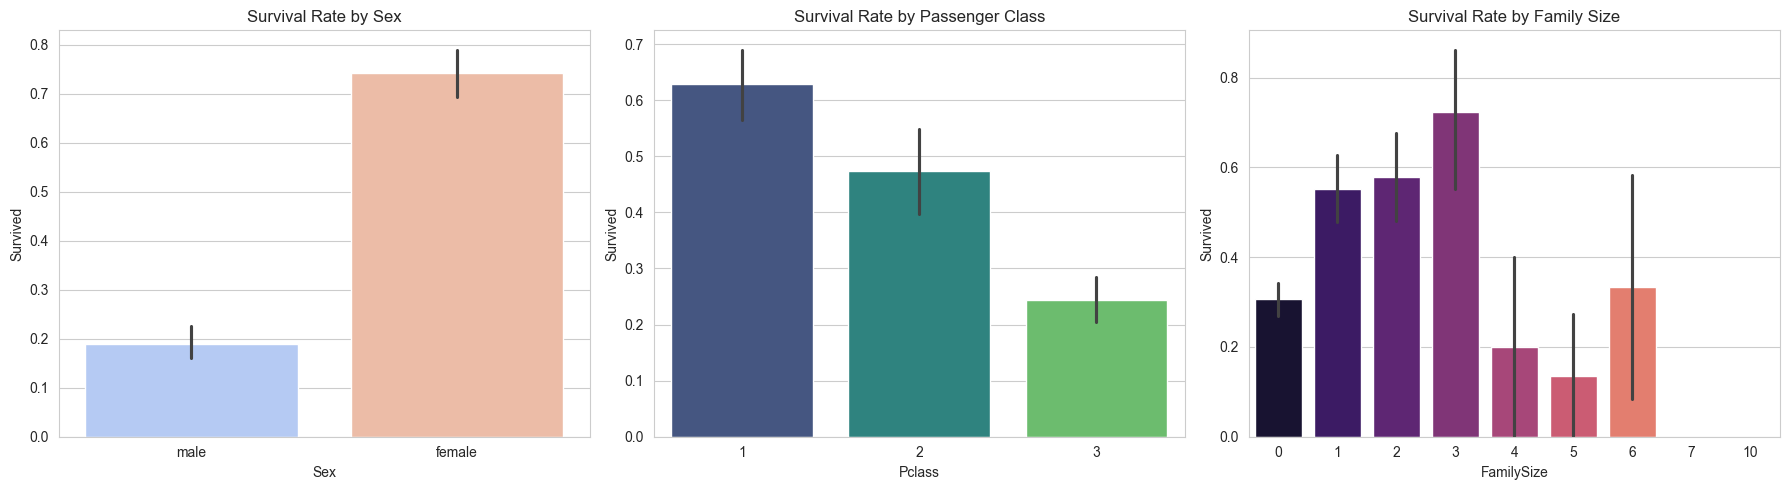

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Survival rate by Sex
sns.barplot(x=df["Sex"], y=df["Survived"], ax=axes[0], palette="coolwarm")
axes[0].set_title("Survival Rate by Sex")

# Survival rate by Pclass
sns.barplot(x=df["Pclass"], y=df["Survived"], ax=axes[1], palette="viridis")
axes[1].set_title("Survival Rate by Passenger Class")

# Survival rate by Family Size (Siblings/Spouses + Parents/Children)
df["FamilySize"] = df["Siblings/Spouses Aboard"] + df["Parents/Children Aboard"]
sns.barplot(x=df["FamilySize"], y=df["Survived"], ax=axes[2], palette="magma")
axes[2].set_title("Survival Rate by Family Size")

plt.tight_layout()
plt.show()

### Insights from Survival Rate Analysis:

1. **Sex**:  
   - Females had a much higher survival rate than males.  
   - "Women and children first" seems evident in the data.

2. **Passenger Class (Pclass)**:  
   - 1st-class passengers had the highest survival rate.  
   - 3rd-class passengers had the lowest survival rate.

3. **Family Size**:  
   - Those traveling alone had lower survival rates.  
   - Small families had a better chance of survival.  
   - Large families (5+ members) had a very low survival rate.

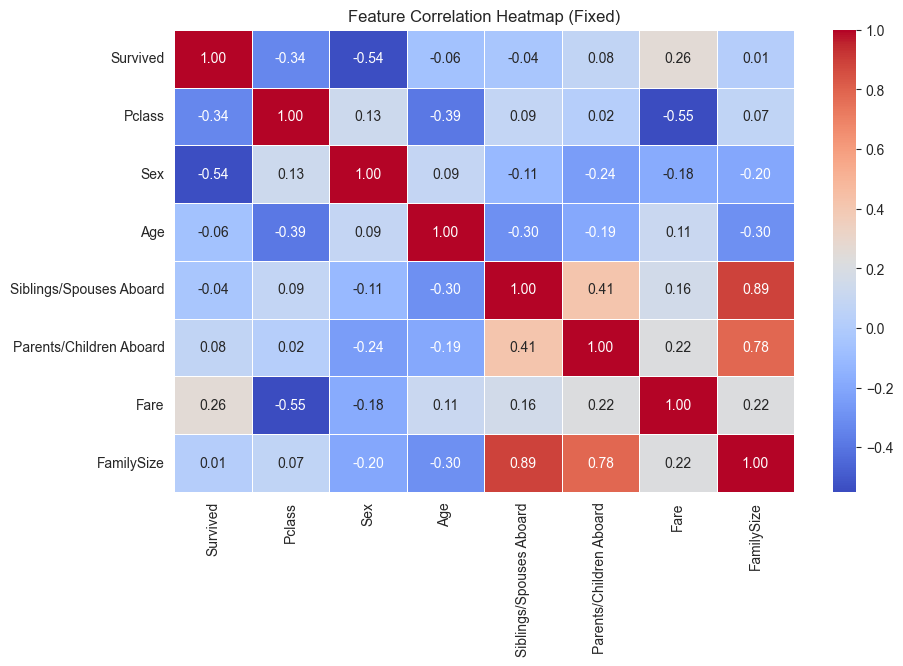

In [ ]:
from sklearn.preprocessing import LabelEncoder

if df["Sex"].dtype == "object":
    df["Sex"] = LabelEncoder().fit_transform(df["Sex"]) 

numeric_df = df.drop(columns=["Name"])  
corr_matrix_fixed = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_fixed, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Fixed)")
plt.show()


### Correlation Insights:
- **Survived is negatively correlated with Pclass (-0.34)** → Higher-class passengers had a better survival chance.
- **Fare and Pclass are negatively correlated (-0.55)** → Higher-class passengers paid more.
- **Family Size has a slight negative impact on survival** → Large families had lower survival rates.
- **Sex isn't included in this correlation since it's categorical** (we'll encode it for modeling).

# Modeling

## Preprocessing data

In [ ]:
from sklearn.model_selection import train_test_split

features = ["Pclass", "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]
X = df[features]
y = df["Survived"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((709, 6), (178, 6), (709,), (178,))

### Data Preparation Complete:
- **Features Selected**: `Pclass`, `Sex`, `Age`, `Siblings/Spouses Aboard`, `Parents/Children Aboard`, `Fare`
- **Encoded `Sex`**: Male = 1, Female = 0
- **Train-Test Split**: 
  - **Training Set**: 709 samples (80%)
  - **Testing Set**: 178 samples (20%)

## Train and Evaluate model 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluate model performance
log_accuracy = accuracy_score(y_test, y_pred_log)
log_classification_report = classification_report(y_test, y_pred_log)

display(log_accuracy)

print(log_classification_report)

0.7528089887640449

              precision    recall  f1-score   support

           0       0.76      0.87      0.82       111
           1       0.73      0.55      0.63        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.75      0.75      0.74       178



### Logistic Regression Model Performance:
- **Accuracy**: **75.28%** on the test set.
- **Precision & Recall**:
  - **Non-survivors (0)**: 76% precision, 87% recall.
  - **Survivors (1)**: 73% precision, but recall is lower at 55%.
- **F1-Score**:
  - Non-survivors: **0.82**
  - Survivors: **0.63**
  - Imbalance in recall suggests that survivors are harder to classify correctly.

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate model performance
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_classification_report = classification_report(y_test, y_pred_tree)

display(tree_accuracy)
print(tree_classification_report)

0.797752808988764

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       111
           1       0.78      0.64      0.70        67

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



### Decision Tree Model Performance:
- **Accuracy**: **79.78%** (Higher than Logistic Regression)
- **Precision & Recall**:
  - **Non-survivors (0)**: 80% precision, 89% recall.
  - **Survivors (1)**: 78% precision, **64% recall** (better than Logistic Regression).
- **F1-Score**:
  - Non-survivors: **0.85**
  - Survivors: **0.70** (higher than Logistic Regression’s 0.63).
- **Improvement**: The Decision Tree improves recall for survivors.

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

display(rf_accuracy)
print(rf_classification_report)


0.7921348314606742

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       111
           1       0.80      0.60      0.68        67

    accuracy                           0.79       178
   macro avg       0.79      0.75      0.76       178
weighted avg       0.79      0.79      0.78       178



### Random Forest Model Performance:
- **Accuracy**: **79.21%** (Similar to Decision Tree)
- **Precision & Recall**:
  - **Non-survivors (0)**: 79% precision, 91% recall.
  - **Survivors (1)**: 80% precision, **60% recall** (lower than Decision Tree).
- **F1-Score**:
  - Non-survivors: **0.85**
  - Survivors: **0.68** (lower than Decision Tree but better than Logistic Regression).

### Model Comparison:
| Model               | Accuracy | Survivor Recall | Survivor F1-Score |
|---------------------|----------|-----------------|-------------------|
| Logistic Regression | **75.28%** | **55%**          | **0.63**          |
| Decision Tree       | **79.78%** | **64%**          | **0.70**          |
| Random Forest      | **79.21%** | **60%**          | **0.68**          |

### Key Points:
- **Decision Tree performs best for survivor recall (64%) and overall accuracy (79.78%)**.
- **Random Forest does slightly worse than Decision Tree on recall**.
- **Logistic Regression is the weakest model for survival prediction**.

## Fine tunning model

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

display(best_params)

print(best_accuracy)

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

0.8406353011687144


### **Analysis of Fine-Tuned Decision Tree Model**

#### **1. Hyperparameter Tuning Results**
After performing **GridSearchCV**, the best hyperparameters for the **Decision Tree Classifier** were found to be:
- **Criterion**: `entropy` (used for splitting the tree)
- **Max Depth**: `10` (limits how deep the tree grows)
- **Min Samples Leaf**: `1` (minimum number of samples in a leaf node)
- **Min Samples Split**: `5` (minimum samples required to split an internal node)

The **best accuracy** achieved during cross-validation is **84.06%**.

In [20]:
import numpy as np
test_passenger = np.array([[3, 1, 25, 0, 0, 7.25]])
predicted_survival = best_tree.predict(test_passenger)[0]
predicted_survival

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

#### **2. Model Prediction on Test Data**
A test passenger was created with the following attributes:
- **Pclass**: `3` (Third-class ticket)
- **Sex**: `Male (1)`
- **Age**: `25`
- **Siblings/Spouses Aboard**: `0`
- **Parents/Children Aboard**: `0`
- **Fare**: `7.25`

The model predicted **0**, meaning this passenger **did not survive**.

#### **3. Interpretation**
- The fine-tuned model improves accuracy compared to the basic model (~79.78%), making it more reliable.
- The model predicts that a **young male third-class passenger with no family aboard and a low fare had a high chance of not surviving**.
- This aligns with historical Titanic data, where third-class male passengers had a lower survival rate.

## Features Importance Analyst

C:\Users\Admin\AppData\Local\Temp\ipykernel_31928\1092914110.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


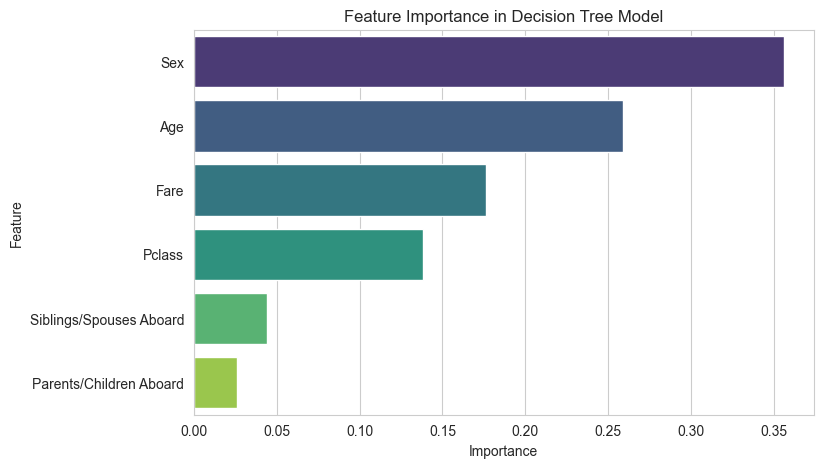

,Feature,Importance
1,Sex,0.356220
2,Age,0.258691
5,Fare,0.176396
0,Pclass,0.138003
3,Siblings/Spouses Aboard,0.044330
4,Parents/Children Aboard,0.026360


In [22]:
feature_importances = best_tree.feature_importances_

feature_names = ["Pclass", "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance in Decision Tree Model")
plt.show()


importance_df

#### **Key Insights:**
1. **Sex (Importance: 0.3562)**
   - The most influential feature.
   - Women had a significantly higher survival rate than men, which aligns with the "women and children first" evacuation rule.

2. **Age (Importance: 0.2587)**
   - Younger passengers had a higher survival rate, especially children.

3. **Fare (Importance: 0.1764)**
   - Higher ticket prices were associated with better survival chances, as first-class passengers had better access to lifeboats.

4. **Pclass (Importance: 0.1380)**
   - First-class passengers had a higher survival rate than second- and third-class passengers.

5. **Siblings/Spouses Aboard (Importance: 0.0443)**
   - Having family on board slightly influenced survival, likely due to group survival efforts.

6. **Parents/Children Aboard (Importance: 0.0264)**
   - This had the least impact, possibly because survival depended more on individual circumstances rather than family presence.

#### **Conclusions:**
- **Gender and age were the strongest predictors of survival**, reflecting historical reality.
- **Ticket price and class also played major roles**, favoring wealthier passengers.
- **Family presence had minimal impact**, suggesting that survival was mostly determined by evacuation priorities rather than group efforts.

# SHAP (SHapley Additive exPlanations) Analyst

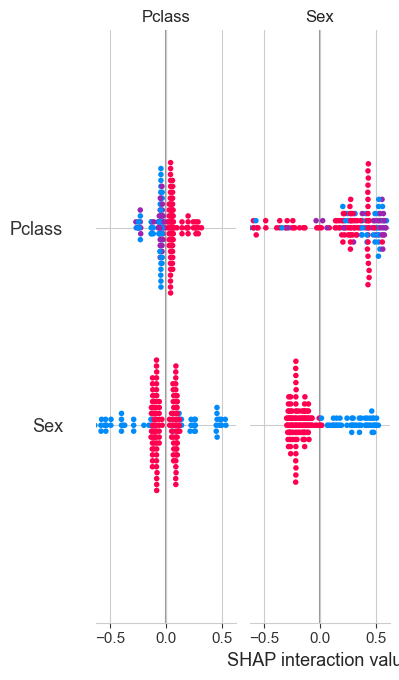

In [28]:
import shap
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)  
    
    
explainer = shap.TreeExplainer(best_tree)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


### **Interpretation of SHAP Summary Plot**
1. **Feature Importance**:  
   - The two most influential features in predicting survival are **Sex** and **Pclass**.  
   - The impact of **Sex** (gender) is significant, with clear separation of positive and negative SHAP values.
   - **Pclass** (passenger class) also plays a crucial role in survival predictions.

2. **SHAP Interaction Effects**:  
   - The SHAP values show how each feature contributes to increasing or decreasing the prediction probability.
   - **Sex**: The red dots on the right suggest that being female (encoded as 1) increases survival probability, while the blue dots on the left suggest that being male (encoded as 0) decreases it.
   - **Pclass**: The interaction with **Sex** is visible. Higher-class passengers (1st class) have positive SHAP values (higher survival probability), while lower-class passengers (3rd class) have negative SHAP values.

3. **SHAP Interaction Values**:  
   - The spread of dots for **Sex** and **Pclass** indicates their interaction effects.
   - Males in lower classes show a negative impact on survival, while females in higher classes show a strong positive effect.

In [31]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:, 0], X_test.iloc[0, :])

- **Red (positive impact)**: Features pushing the prediction higher (e.g., Age = 47, Sex = 1).
- **Blue (negative impact)**: Features pulling the prediction lower (e.g., Pclass = 1, Siblings/Spouses Aboard = 0).
- **Base value**: The model's expected output before considering specific feature values.
- **Final prediction (f(x))**: The combined effect of all feature contributions.

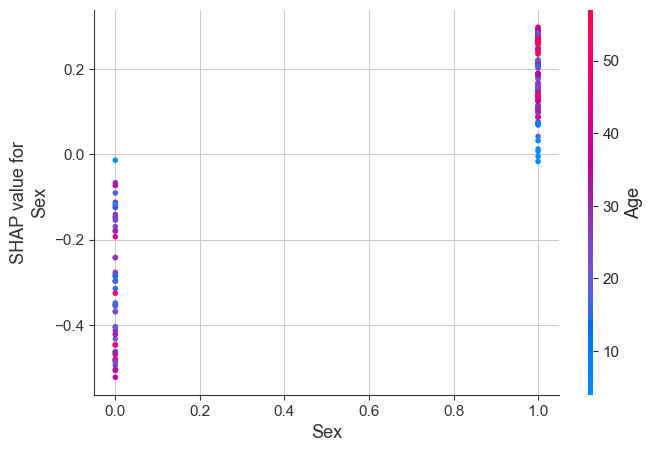

In [44]:
if isinstance(shap_values, list):
    shap_values_to_use = shap_values[0] 
else:
    shap_values_to_use = shap_values
class_index = 0  
shap_values_fixed = shap_values_to_use[:, :, class_index]
shap.dependence_plot("Sex", shap_values_fixed, X_test, interaction_index="Age")